In [1]:
pip install pandas matplotlib seaborn numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

file_path = 'C:/Users/lovek/문서/JN/Netflix_Movies_and_TV_Shows.csv'
df = pd.read_csv(file_path)

df.head()

,Title,Type,Genre,Release Year,Rating,Duration,Country
0,Title 1,TV Show,Comedy,1955,PG,3 Seasons,Japan
1,Title 2,TV Show,Horror,2020,G,3 Seasons,India
2,Title 3,TV Show,Action,1966,TV-PG,140 min,United States
3,Title 4,Movie,Thriller,2011,PG-13,3 Seasons,Canada
4,Title 5,TV Show,Romance,1959,TV-14,172 min,India


In [7]:
df_filtered = df[['Release Year', 'Genre']]

df_filtered.loc[:, 'Genre'] = df_filtered['Genre'].str.split(', ')

df_filtered.head()

,Release Year,Genre
0,1955,[Comedy]
1,2020,[Horror]
2,1966,[Action]
3,2011,[Thriller]
4,1959,[Romance]


In [8]:
genre_year_count = df_filtered.explode('Genre')

genre_year_count = genre_year_count.groupby(['Release Year', 'Genre']).size().reset_index(name='count')

genre_year_count.head()

,Release Year,Genre,count
0,1950,Action,7
1,1950,Comedy,4
2,1950,Documentary,6
3,1950,Drama,5
4,1950,Horror,7


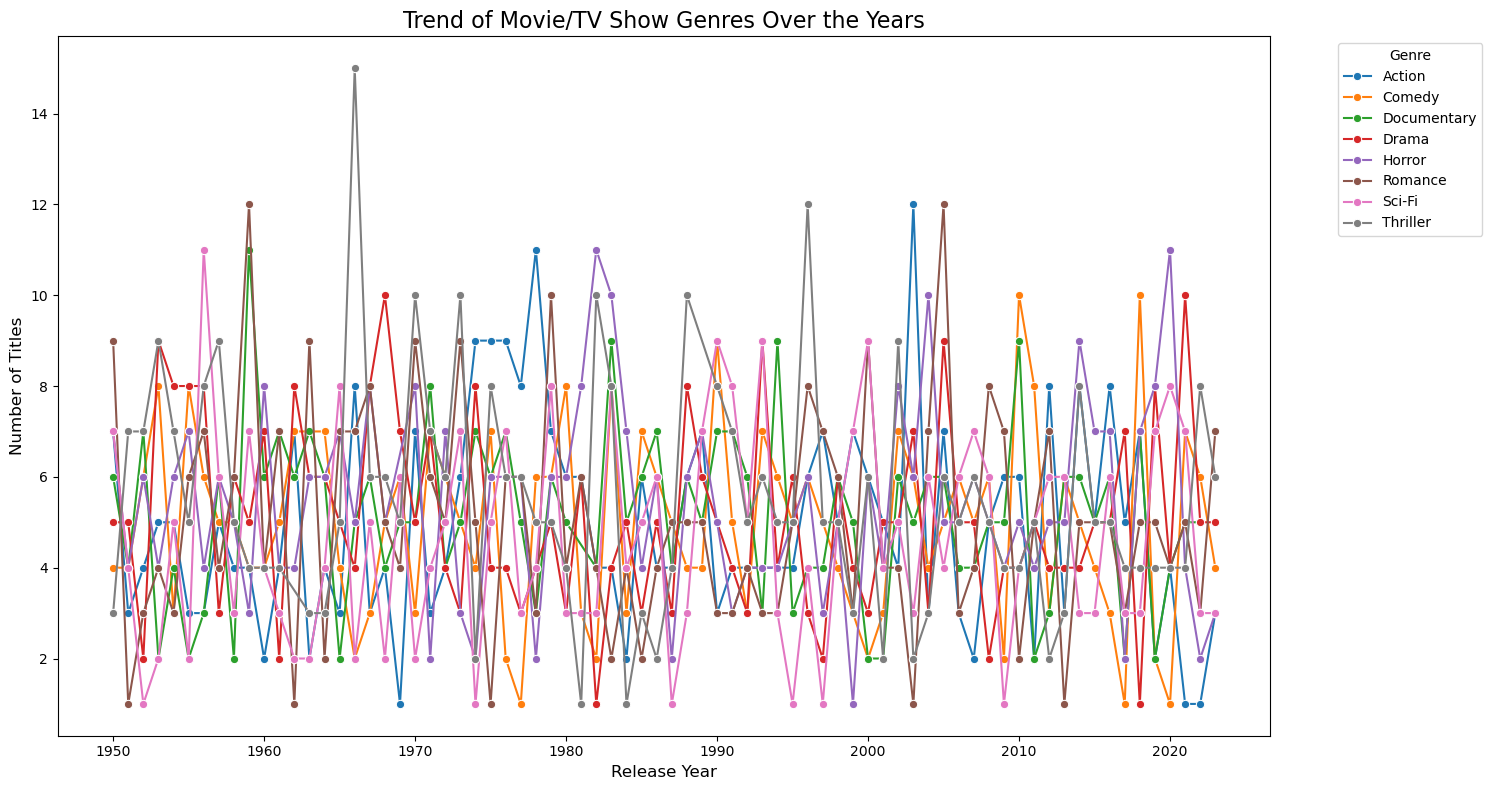

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

sns.lineplot(
    data=genre_year_count,
    x='Release Year',
    y='count',
    hue='Genre',
    marker='o'
)

plt.title('Trend of Movie/TV Show Genres Over the Years', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

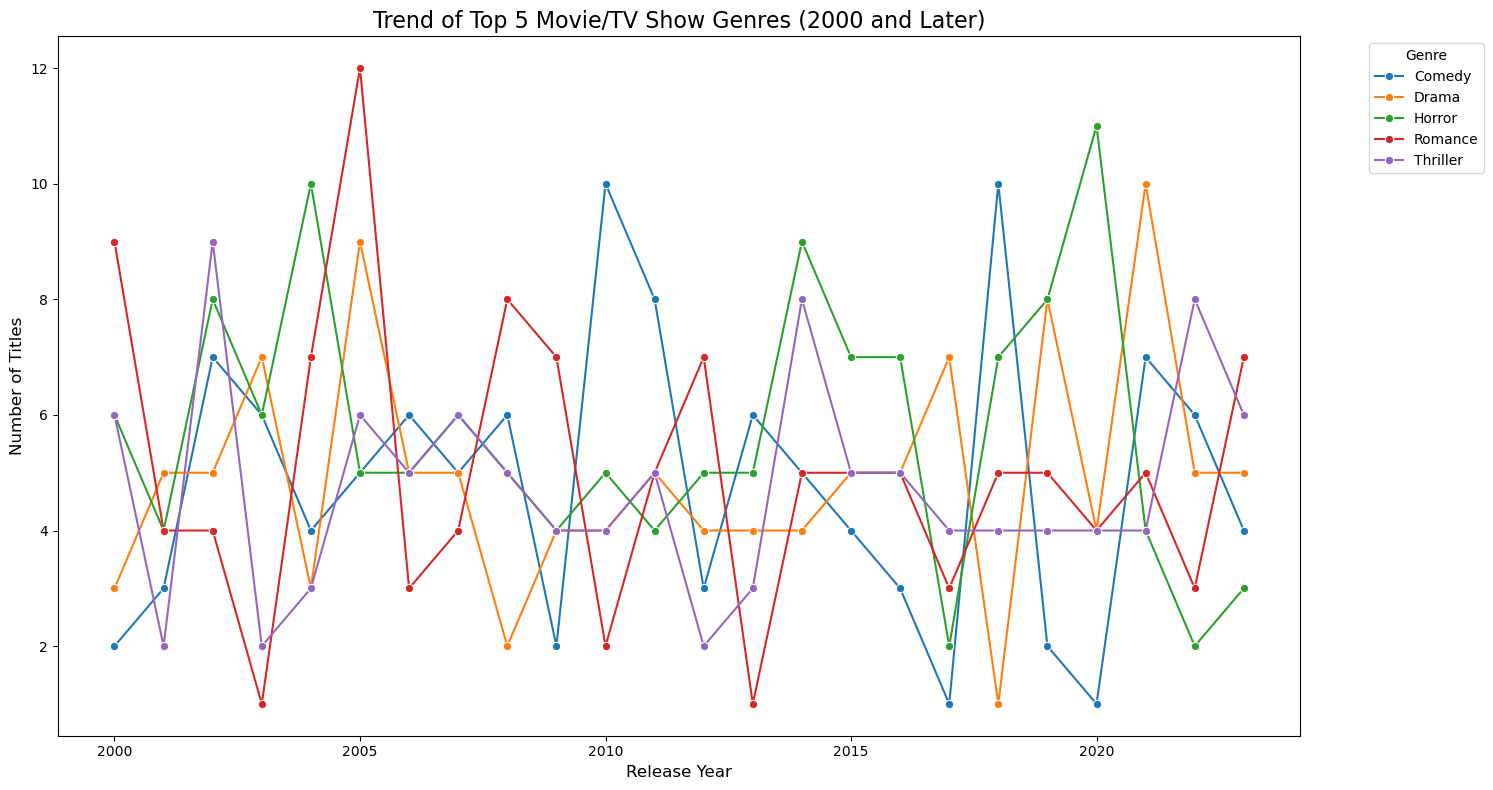

In [13]:
top_genres = genre_year_count.groupby('Genre')['count'].sum().nlargest(5).index

filtered_data = genre_year_count[
    (genre_year_count['Release Year'] >= 2000) &
    (genre_year_count['Genre'].isin(top_genres))
]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

sns.lineplot(
    data=filtered_data,
    x='Release Year',
    y='count',
    hue='Genre',
    marker='o'
)

plt.title('Trend of Top 5 Movie/TV Show Genres (2000 and Later)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

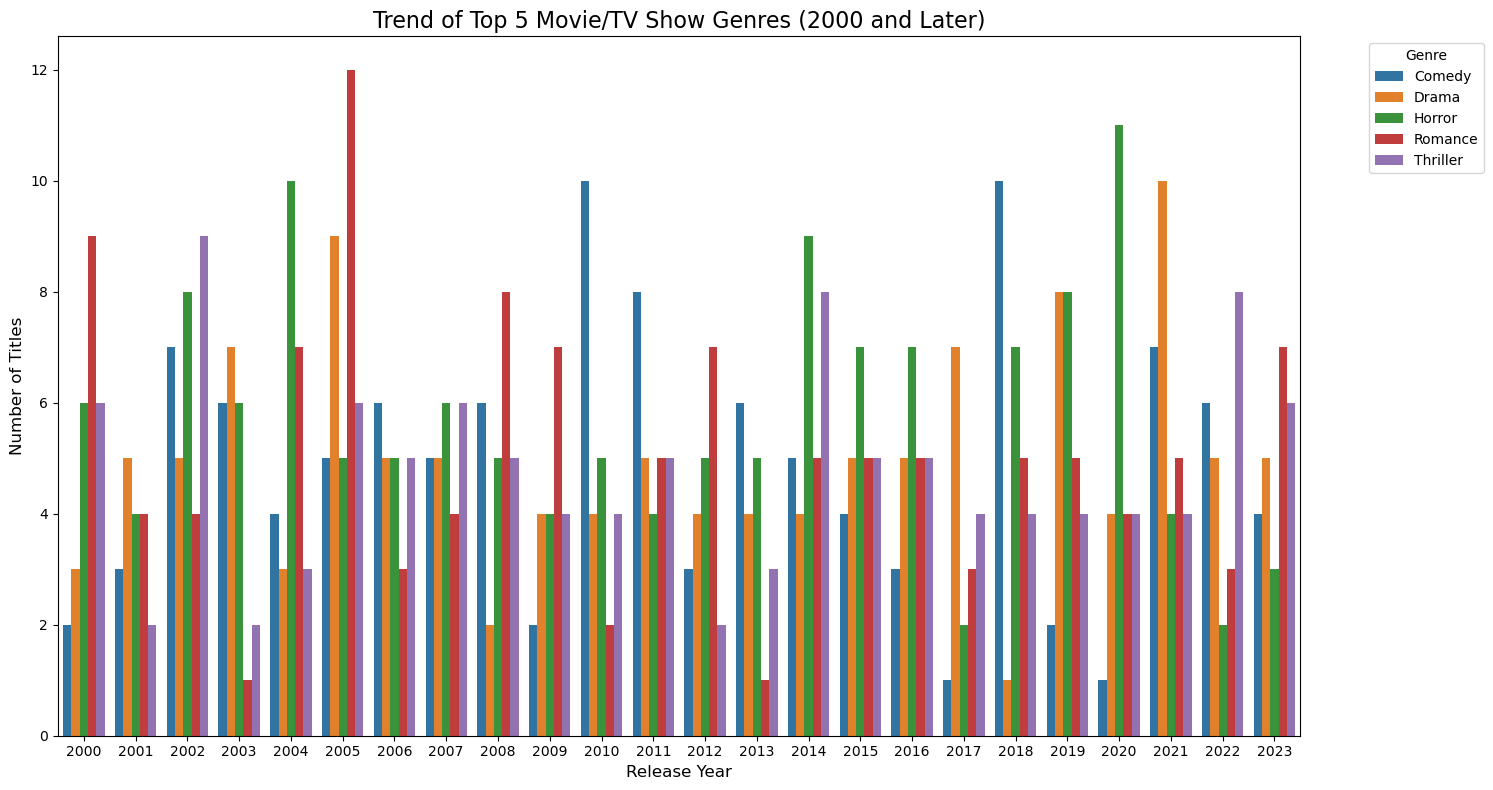

In [14]:
plt.figure(figsize=(15, 8))

sns.barplot(
    data=filtered_data,
    x='Release Year',
    y='count',
    hue='Genre'
)

plt.title('Trend of Top 5 Movie/TV Show Genres (2000 and Later)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

Accuracy: 0.12
Classification Report:
              precision    recall  f1-score   support

      Action       1.00      0.00      0.00        67
      Comedy       1.00      0.00      0.00        80
 Documentary       1.00      0.00      0.00        74
       Drama       1.00      0.00      0.00        75
      Horror       0.13      0.39      0.20        84
     Romance       1.00      0.00      0.00        69
      Sci-Fi       1.00      0.00      0.00        75
    Thriller       0.11      0.51      0.18        76

    accuracy                           0.12       600
   macro avg       0.78      0.11      0.05       600
weighted avg       0.77      0.12      0.05       600



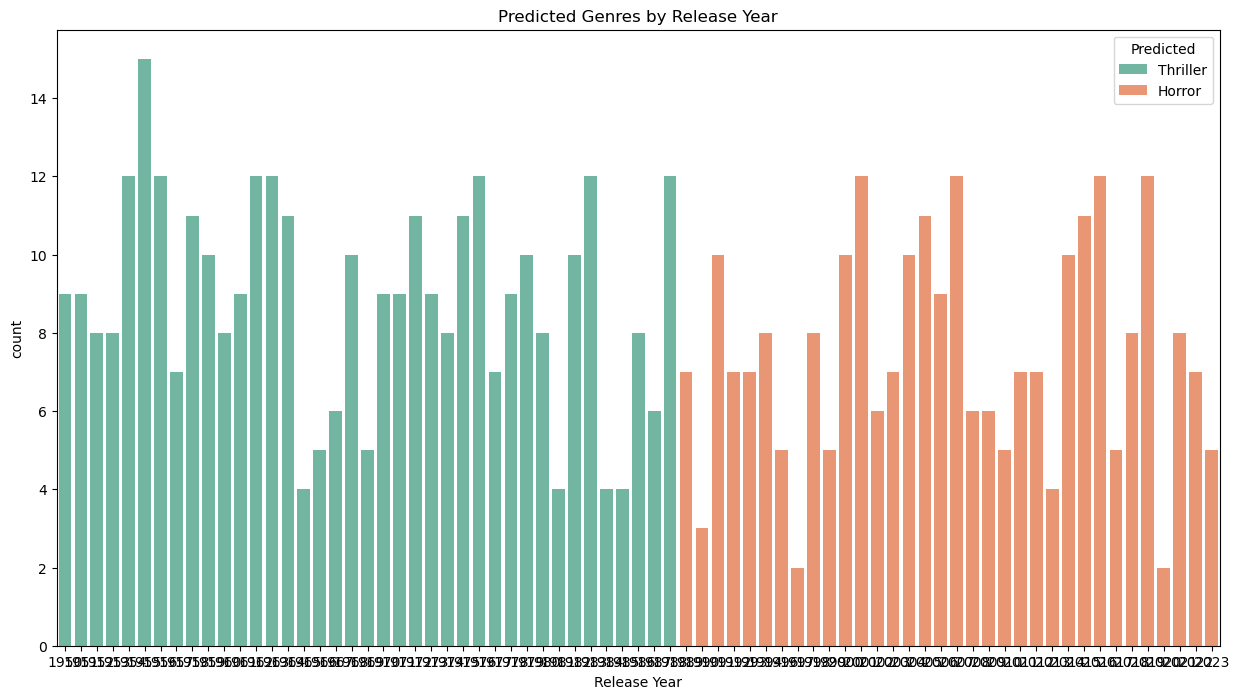

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df_exploded = df_filtered.explode('Genre')

label_encoder = LabelEncoder()
df_exploded['Genre_encoded'] = label_encoder.fit_transform(df_exploded['Genre'])

X = df_exploded[['Release Year']]
y = df_exploded['Genre_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

comparison = X_test.copy()
comparison['Actual'] = label_encoder.inverse_transform(y_test)
comparison['Predicted'] = label_encoder.inverse_transform(y_pred)

plt.figure(figsize=(15, 8))
sns.countplot(data=comparison, x='Release Year', hue='Predicted', palette='Set2')
plt.title("Predicted Genres by Release Year")
plt.show()